<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/blob/main/Chapter11/Detectron2_Chapter11_PointRend_Existing.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 11 - Using Existing PointRend Model

# Installation

In [ ]:
!python -m pip install \
'git+https://github.com/facebookresearch/detectron2.git'

## Witout PointRend

In [ ]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
# New
# import PointRend project
from detectron2.projects import point_rend
# Select a model
config_file = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
checkpoint_url = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
# Create a configuration file
cfg = get_cfg()
config_file = model_zoo.get_config_file(config_file)
cfg.merge_from_file(config_file)
# Download weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
score_thresh_test = 0.95
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
predictor = DefaultPredictor(cfg)

In [ ]:
!wget https://github.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/raw/main/datasets/800x800image/input.jpeg

In [ ]:
import cv2
input_url = "input.jpeg"
img = cv2.imread(input_url)
output = predictor(img)

/home/pham/anaconda3/lib/python3.7/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484809535/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


## Visualization

In [ ]:
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

def imshow(image):
  dpi = plt.rcParams["figure.dpi"]
  im_data = image[:,:, ::-1]
  height, width, depth = im_data.shape
  figsize = width / float(dpi), height / float(dpi)
  fig = plt.figure(figsize=figsize)
  plt.imshow(im_data)
  plt.imshow(im_data)
  plt.axis("off")
  plt.show()

def visualize(img, cfg, output):
  metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
  v = Visualizer(img[:, :, ::-1], metadata, scale=1.0)
  instances = output["instances"].to("cpu")
  annotated_img = v.draw_instance_predictions(instances)
  imshow(annotated_img.get_image()[:, :, ::-1])

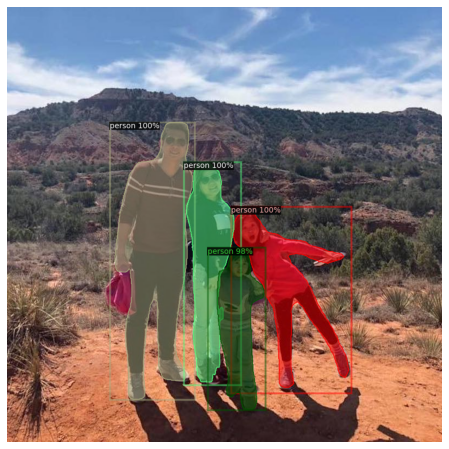

In [ ]:
visualize(img, cfg, output)


## Using Existing PointRend Model

In [ ]:
# clone the repo in order to access pre-defined configs in PointRend project
!git clone https://github.com/facebookresearch/detectron2.git detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 14778, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 14778 (delta 18), reused 38 (delta 12), pack-reused 14721
Receiving objects: 100% (14778/14778), 6.04 MiB | 11.72 MiB/s, done.
Resolving deltas: 100% (10684/10684), done.


In [ ]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
# New
# import PointRend project
from detectron2.projects import point_rend
# Select a model
config_file = "detectron2_repo/projects/PointRend/configs/InstanceSegmentation/pointrend_rcnn_X_101_32x8d_FPN_3x_coco.yaml"
checkpoint_url = "detectron2://PointRend/InstanceSegmentation/pointrend_rcnn_X_101_32x8d_FPN_3x_coco/28119989/model_final_ba17b9.pkl"
# Create a configuration file
cfg = get_cfg()
# Add PointRend-specific config
point_rend.add_pointrend_config(cfg)
cfg.merge_from_file(config_file)
# Download weights
cfg.MODEL.WEIGHTS = checkpoint_url
score_thresh_test = 0.95
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
predictor = DefaultPredictor(cfg)

Weight format of PointRend models have changed! Applying automatic conversion now ...
The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


In [ ]:
output = predictor(img)

/home/pham/anaconda3/lib/python3.7/site-packages/detectron2/projects/point_rend/point_features.py:142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  point_coords[:, :, 1] = h_step / 2.0 + (point_indices // W).to(torch.float) * h_step


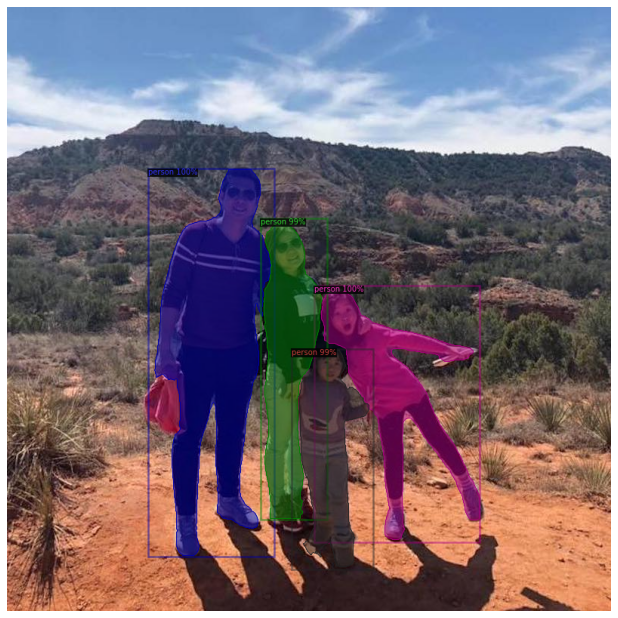

In [ ]:
visualize(img, cfg, output)